# **Projet 1 : EDA**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [2]:
data = pd.read_csv('/content/marketing_campaign.csv',sep = ';')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


Contexte
Un modèle de réponse peut améliorer considérablement l'efficacité d'une campagne de marketing en augmentant le nombre de réponses ou en réduisant les dépenses. L'objectif est de prédire qui répondra à une offre de produit ou de service.
Contenu
AcceptedCmp1 - 1 si le client a accepté l'offre lors de la première campagne, 0 sinon
AcceptedCmp2 - 1 si le client a accepté l'offre lors de la 2e campagne, 0 sinon
AcceptedCmp3 - 1 si le client a accepté l'offre lors de la 3e campagne, 0 sinon
AcceptedCmp4 - 1 si le client a accepté l'offre lors de la 4ème campagne, 0 sinon
AcceptedCmp5 - 1 si le client a accepté l'offre lors de la 5e campagne, 0 sinon
Réponse (cible) - 1 si le client a accepté l'offre lors de la dernière campagne, 0 sinon
Plainte - 1 si le client s'est plaint au cours des 2 dernières années
DtCustomer - date d'inscription du client auprès de l'entreprise
Education - niveau d'éducation du client
Marital - état matrimonial du client
Kidhome : nombre d'enfants en bas âge dans le ménage du client
Teenhome - nombre d'adolescents dans le foyer du client
Income - Revenu annuel du ménage du client
MntFishProducts - montant dépensé en produits de la pêche au cours des deux dernières années
MntMeatProducts - montant dépensé pour des produits à base de viande au cours des 2 dernières années
MntFruits - montant dépensé pour des produits à base de fruits au cours des 2 dernières années
MntSweetProducts - montant dépensé pour des produits sucrés au cours des 2 dernières années
MntWines - montant dépensé pour des produits à base de vin au cours des 2 dernières années
MntGoldProds - montant dépensé pour des produits en or au cours des 2 dernières années
NumDealsPurchases - nombre d'achats effectués avec des réductions
NumCatalogPurchases - nombre d'achats effectués sur catalogue
NumStorePurchases - nombre d'achats effectués directement dans les magasins
NumWebPurchases - nombre d'achats effectués sur le site web de l'entreprise
NumWebVisitsMonth - nombre de visites sur le site web de l'entreprise au cours du dernier mois
Recency - nombre de jours écoulés depuis le dernier achat

In [3]:
data.shape

(2240, 29)

Le dataset comporte 2240 lignes et 29 colonnes

In [4]:
data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


Conclusion : Toutes les variables sont non nulles sauf la variable "Income" qui contient 24 valeurs nulles

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

On remarque que pratiquement toutes les variables sont de types int64(25) et le reste est de type float64(1) et object(3)

In [6]:
#Stat descriptive
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [7]:
data.duplicated().sum()

0

Il n'y a pas de doublons dans le dataset

# **Visualisation de la Distribution des Variables**

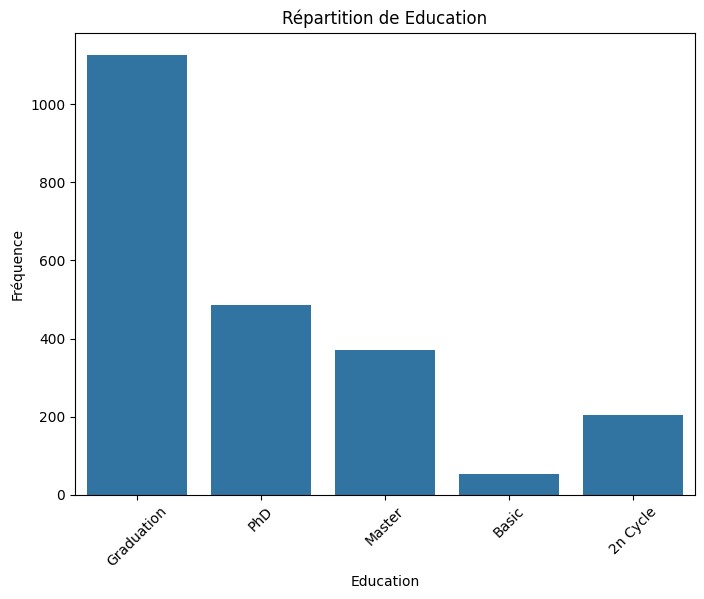

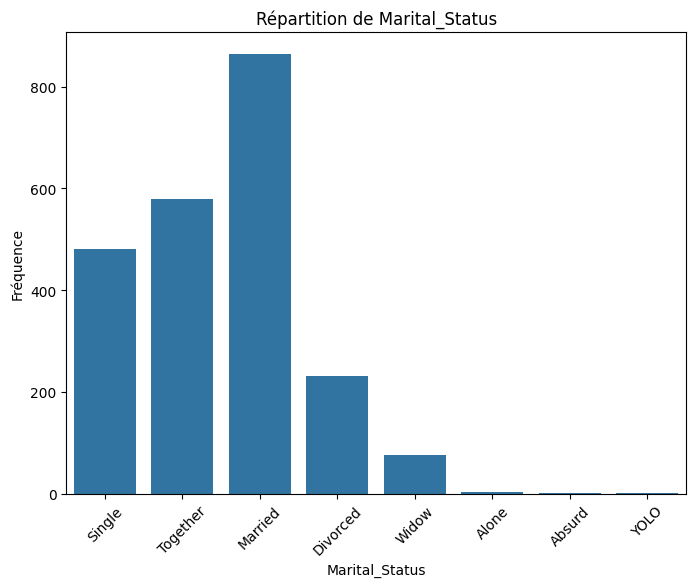

In [8]:
# histogramme pour chaque niveau d'éducation
cat_col = ['Education', 'Marital_Status']
for col in cat_col:
    plt.figure(figsize=(8, 6))
    sn.countplot(data=data, x=col)
    plt.title(f'Répartition de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.xticks(rotation=45)
    plt.show()

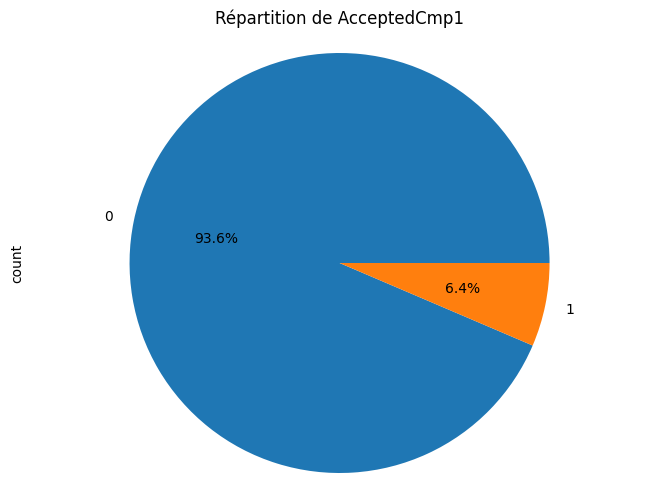

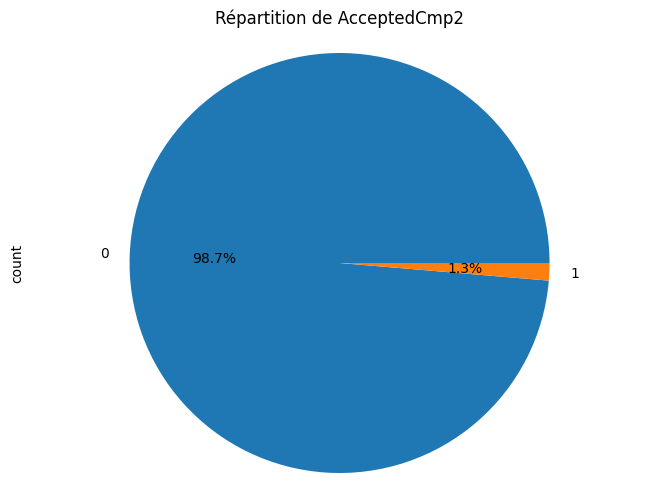

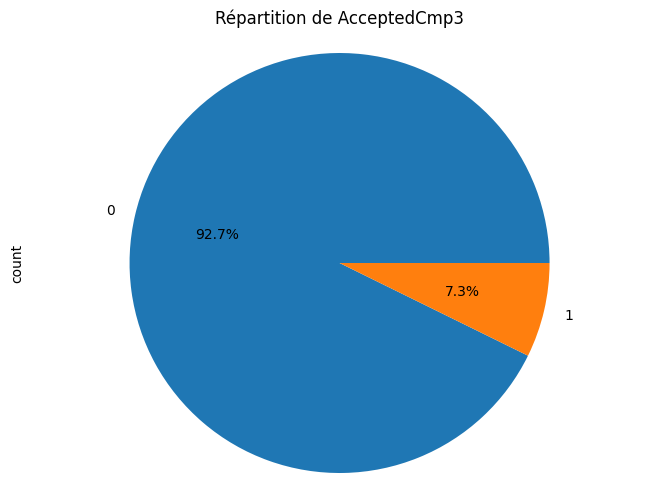

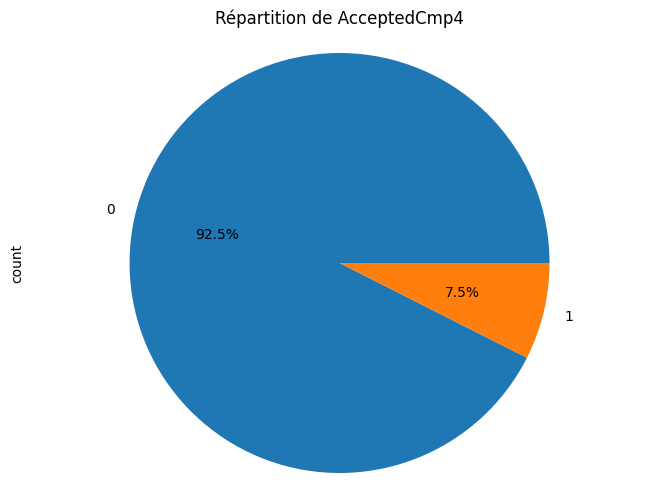

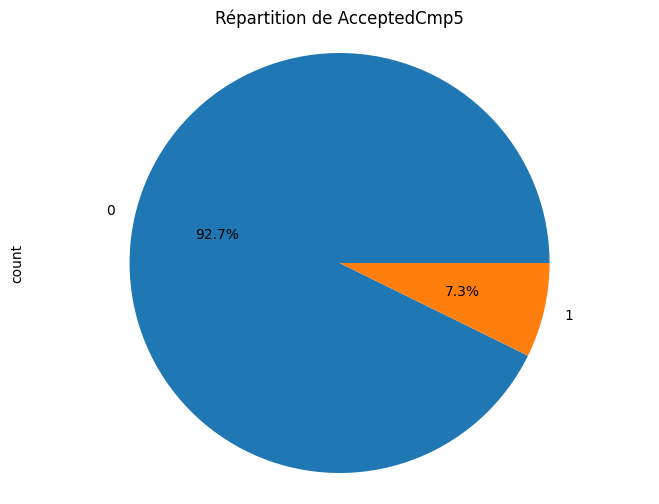

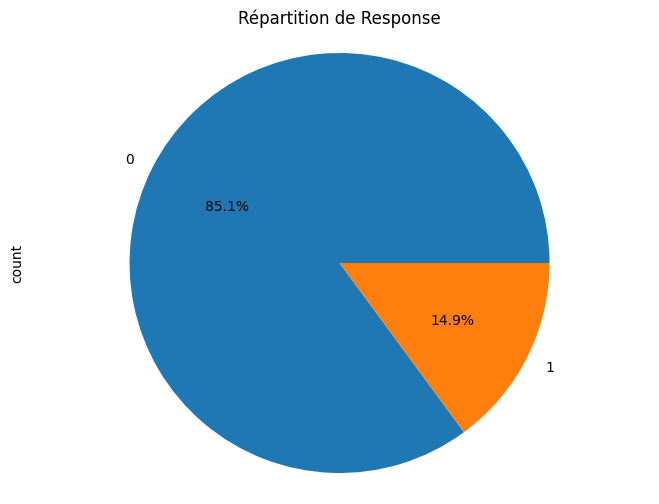

In [9]:
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']
for col in campaign_columns:
    plt.figure(figsize=(8, 6))
    data[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Répartition de {col}')
    plt.axis('equal')
    plt.show()

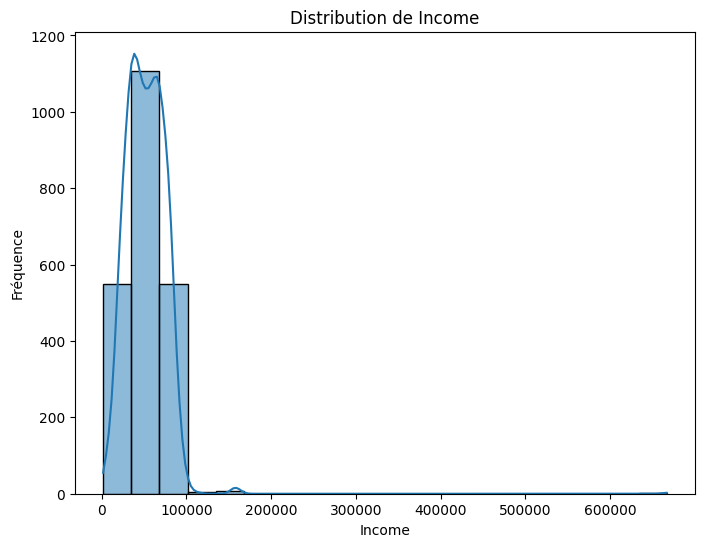

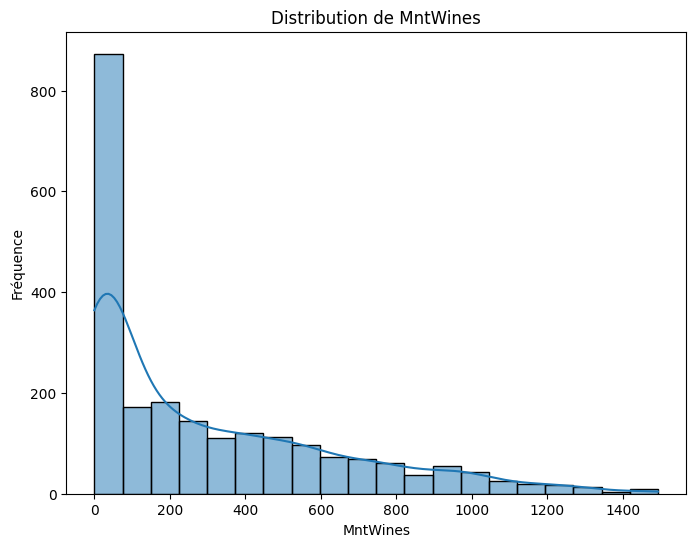

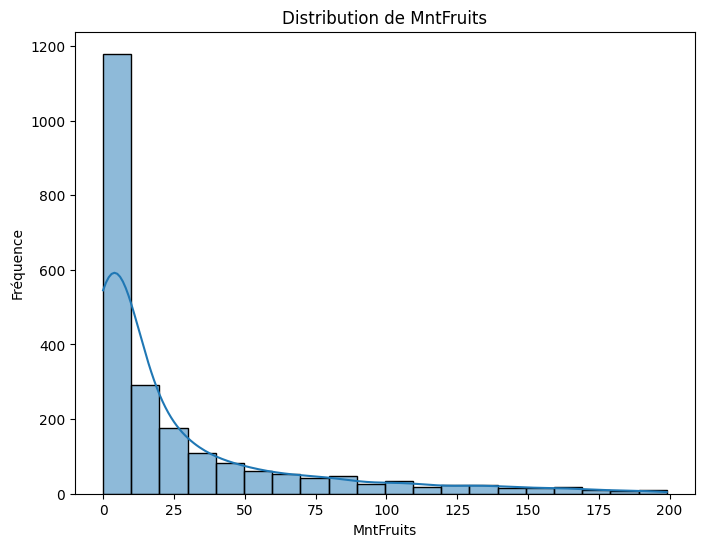

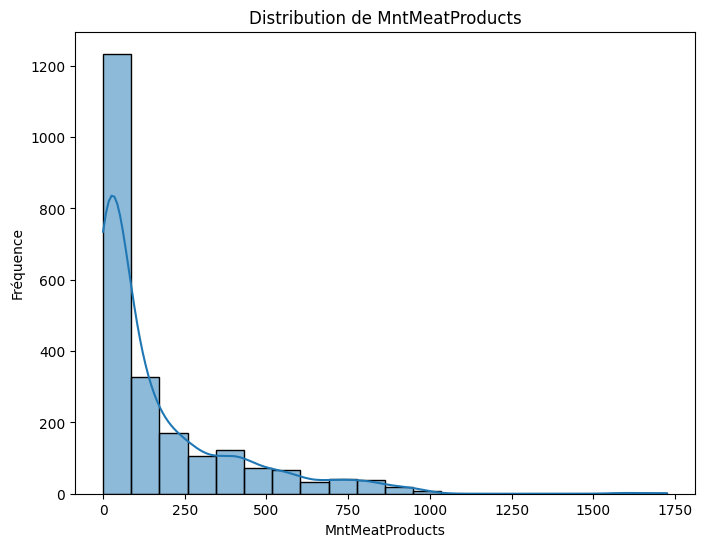

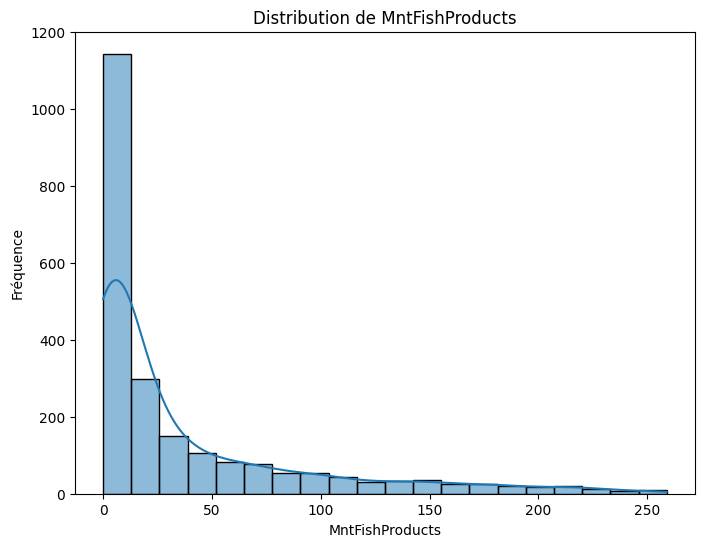

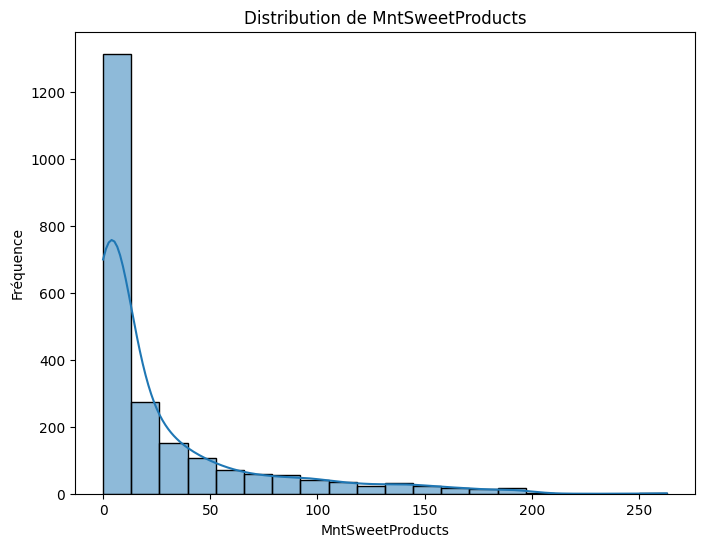

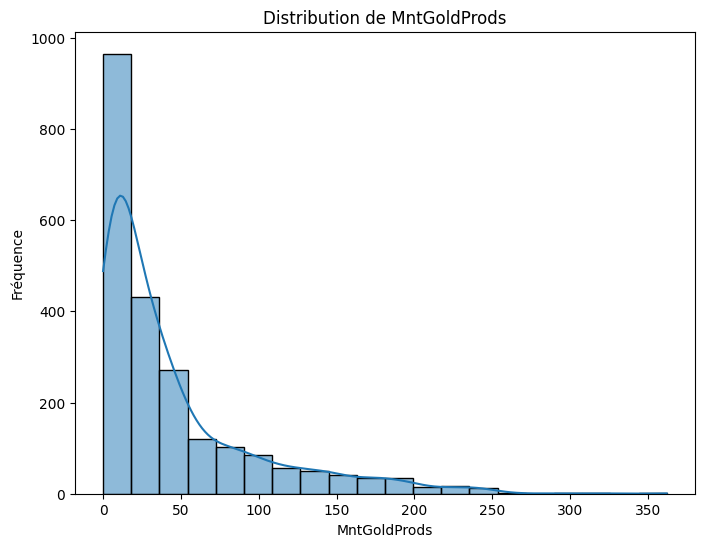

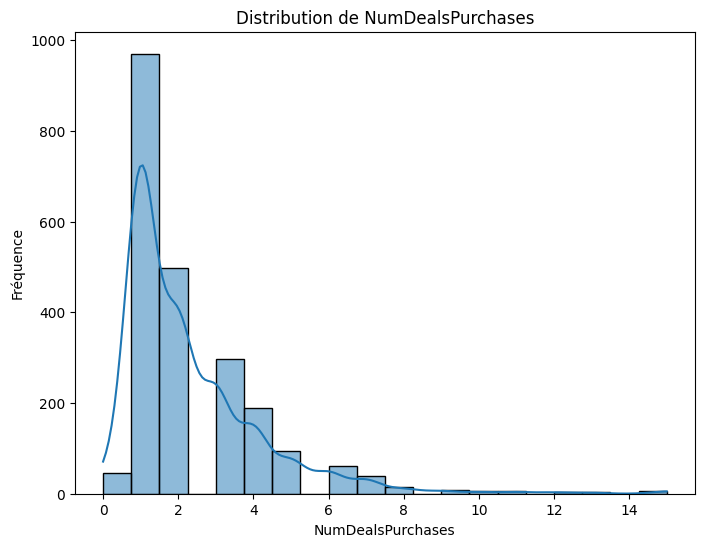

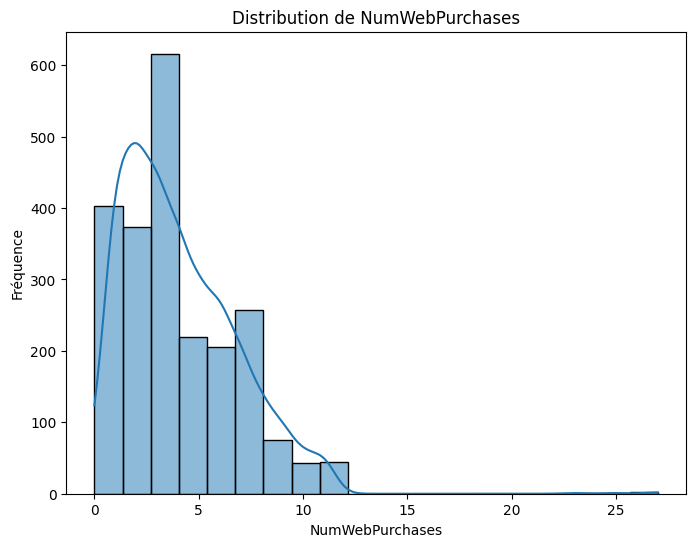

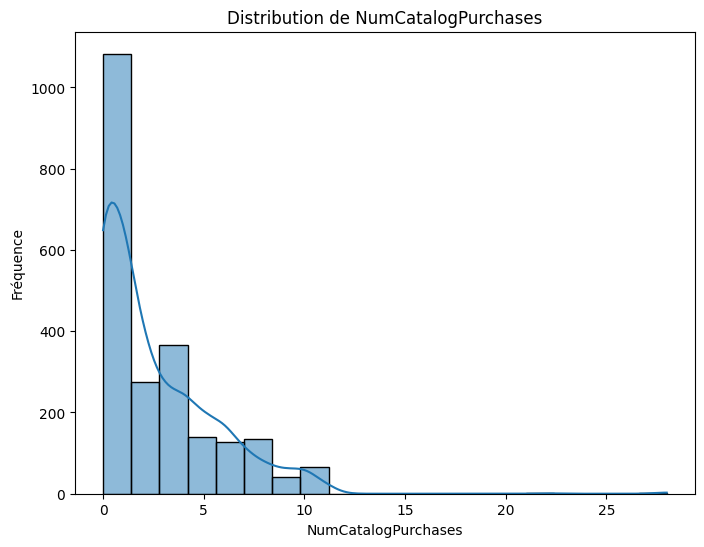

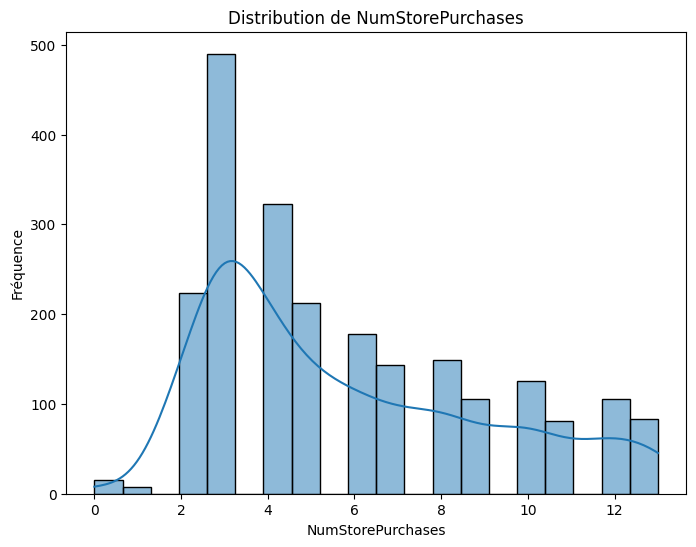

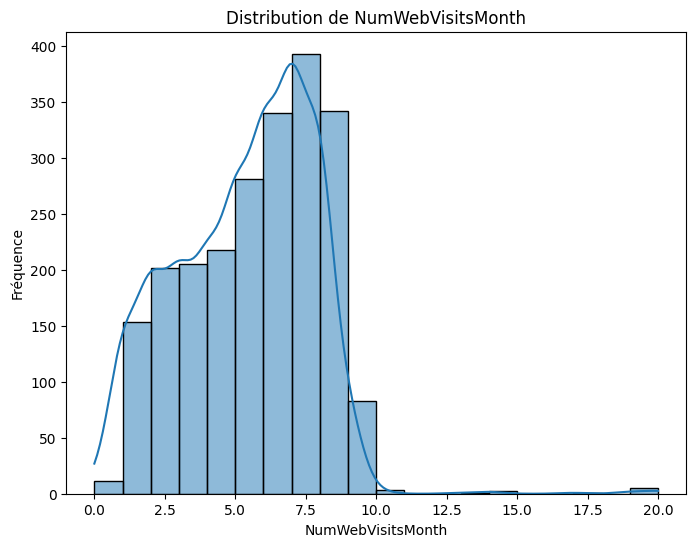

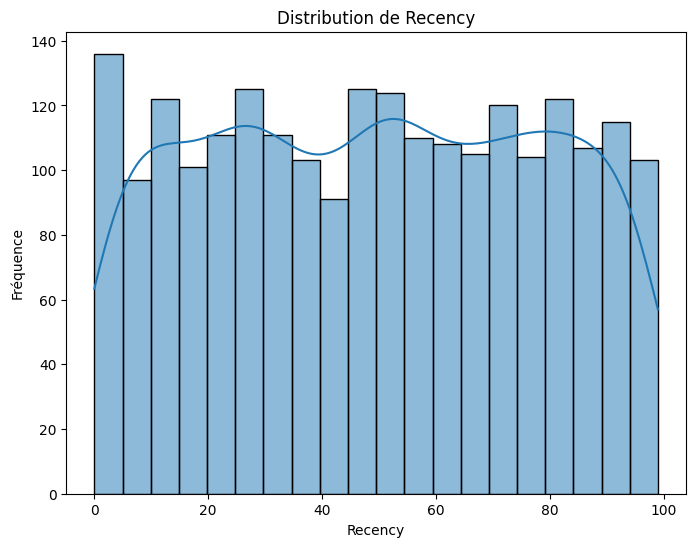

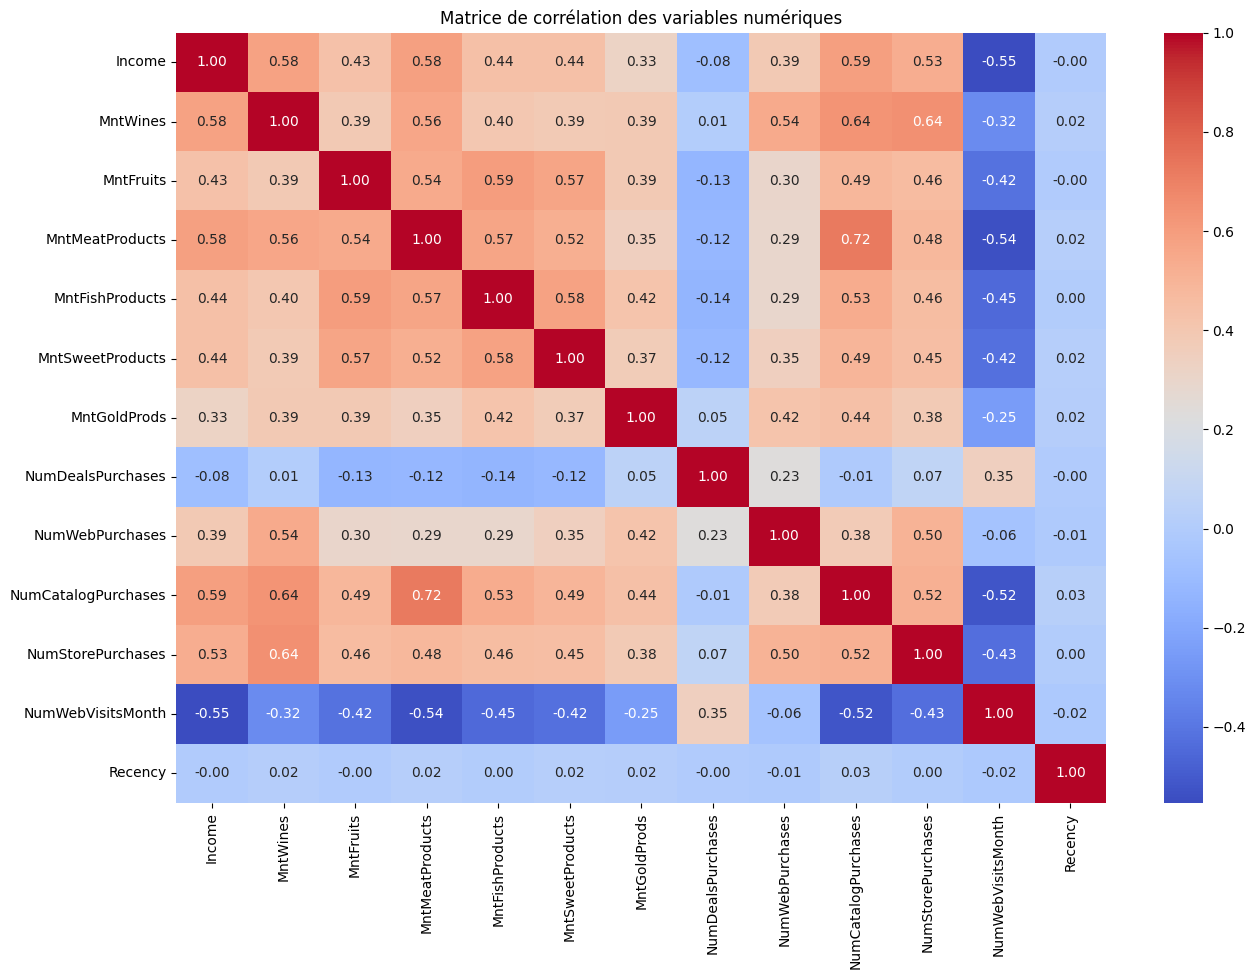

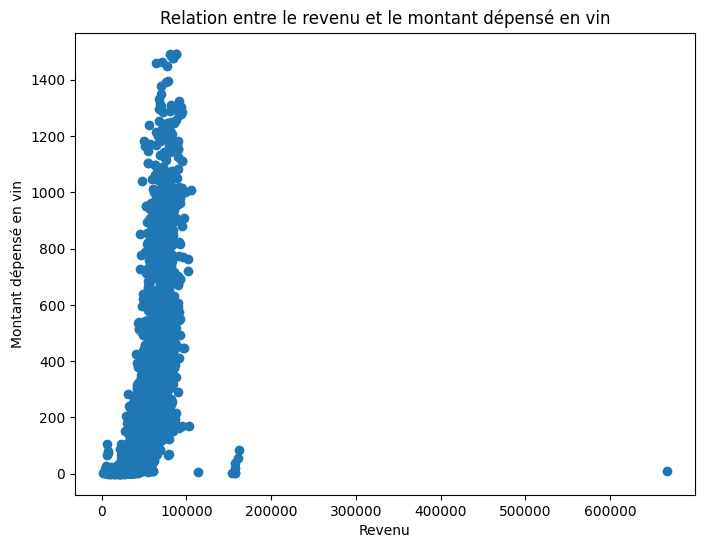

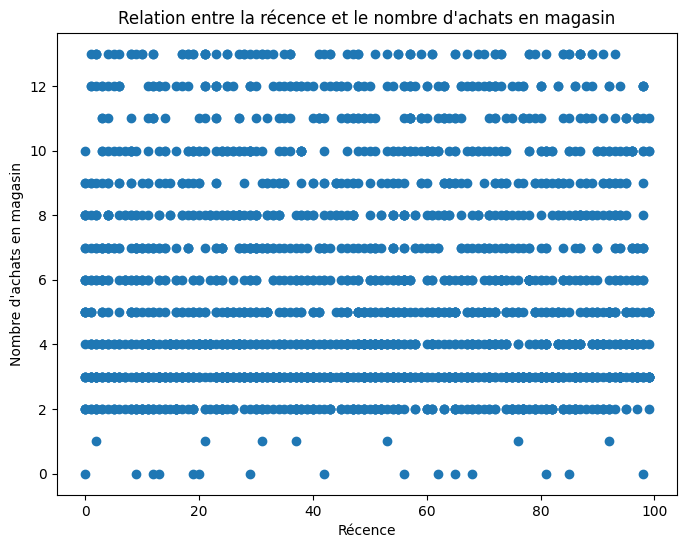

In [10]:
numerical_features = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                     'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                     'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Recency']

for col in numerical_features:
  plt.figure(figsize=(8, 6))
  sn.histplot(data[col].dropna(), bins=20,kde=True)
  plt.title(f'Distribution de {col}')
  plt.xlabel(col)
  plt.ylabel('Fréquence')
  plt.show()


# Matrice de corrélation
correlation_matrix = data[numerical_features].corr()
plt.figure(figsize=(15, 10))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation des variables numériques')
plt.show()


# Scatter plots pour visualiser les relations entre les variables
#sn.pairplot(data[numerical_features], diag_kind='kde')
#plt.show()

# Analyse plus approfondie des relations entre des variables spécifiques
plt.figure(figsize=(8, 6))
plt.scatter(data['Income'], data['MntWines'])
plt.title('Relation entre le revenu et le montant dépensé en vin')
plt.xlabel('Revenu')
plt.ylabel('Montant dépensé en vin')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(data['Recency'], data['NumStorePurchases'])
plt.title('Relation entre la récence et le nombre d\'achats en magasin')
plt.xlabel('Récence')
plt.ylabel('Nombre d\'achats en magasin')
plt.show()

# **Tableau de bord intéractif avec dash**

In [12]:
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 16.5 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.2
    Uninstalling Werkzeug-3.1.2:
      Successfully uninstalled Werkzeug-3.1.2


In [13]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd

app = dash.Dash(__name__)

app.layout = html.Div(children=[
    html.H1(children="Marketing Campaign Dashboard"),

    html.Div(children='''
        Analyse des campagnes marketing.
    '''),

    dcc.Graph(
        id='example-graph',
        figure=px.histogram(data, x="Income", nbins=20, title="Distribution du Revenu")
    ),

    dcc.Graph(
        id='campaign-acceptance',
        figure=px.pie(data, names='Response', title="Taux d'acceptation de la dernière campagne")
    ),

    dcc.Graph(
        id='correlation-matrix',
        figure=px.imshow(data[['Income', 'MntWines', 'MntFruits', 'MntMeatProducts']].corr(),
                         title="Matrice de corrélation")
    ),

    dcc.Dropdown(
        id='dropdown-feature',
        options=[{'label': i, 'value': i} for i in ['MntWines', 'MntFruits', 'MntMeatProducts']],
        value='MntWines'
    ),
    dcc.Graph(id='scatter-plot')
])

@app.callback(
    dash.Output('scatter-plot', 'figure'),
    [dash.Input('dropdown-feature', 'value')]
)
def update_scatter_plot(selected_feature):
    fig = px.scatter(data, x="Income", y=selected_feature, title=f"Relation entre le revenu et {selected_feature}")
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>